## Problem Statement
### Forecast the Airlines Passengers.
### Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Airlines+Data.xlsx')

df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Data Exploration

In [4]:
df.isnull().any()

Month         False
Passengers    False
dtype: bool

In [6]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df[df.duplicated()]

## There are no duplicates.

,Month,Passengers


In [9]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Making the Date columns to datetime type

In [10]:
df['Date'] = pd.to_datetime(df['Month'], format='%b-%y')

In [11]:
df['month'] = df.Date.dt.strftime('%b')
df['year'] = df.Date.dt.strftime('%Y')

In [12]:
df.head()

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


## Data Visualization

<Axes: xlabel='month', ylabel='year'>

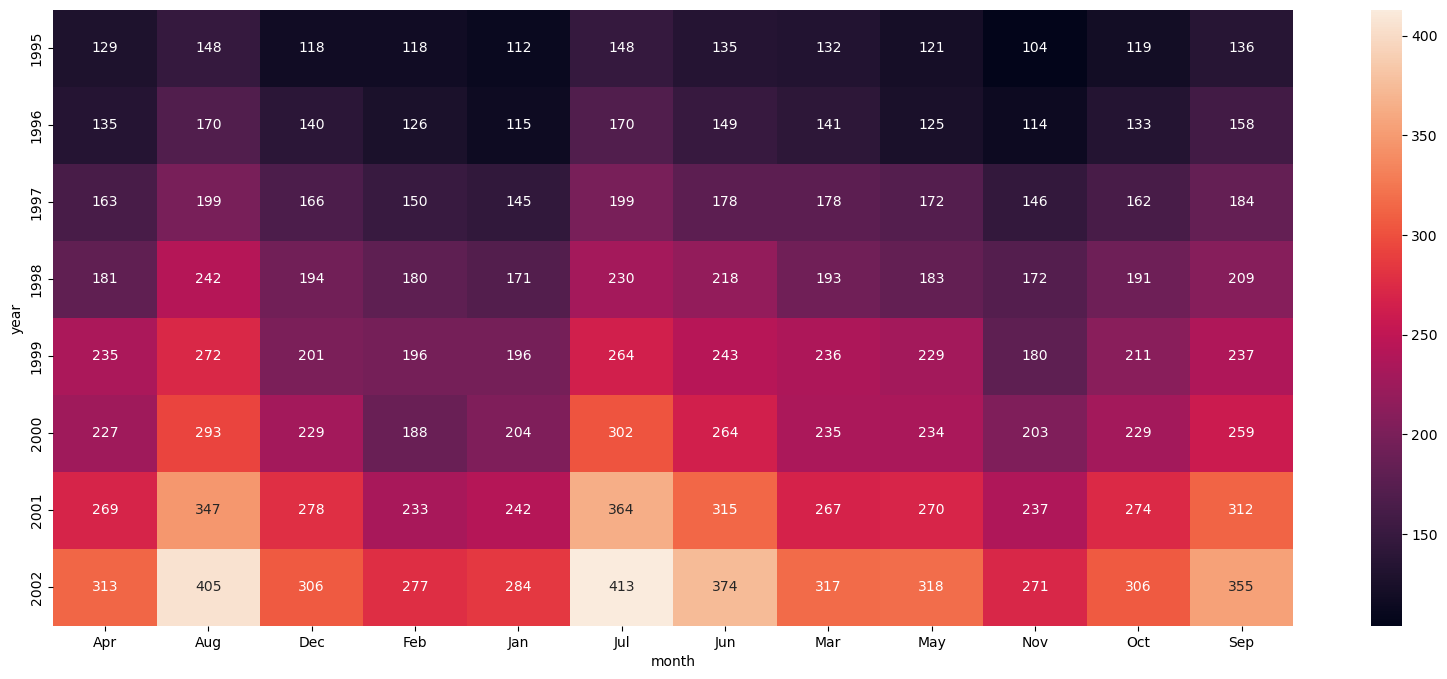

In [13]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

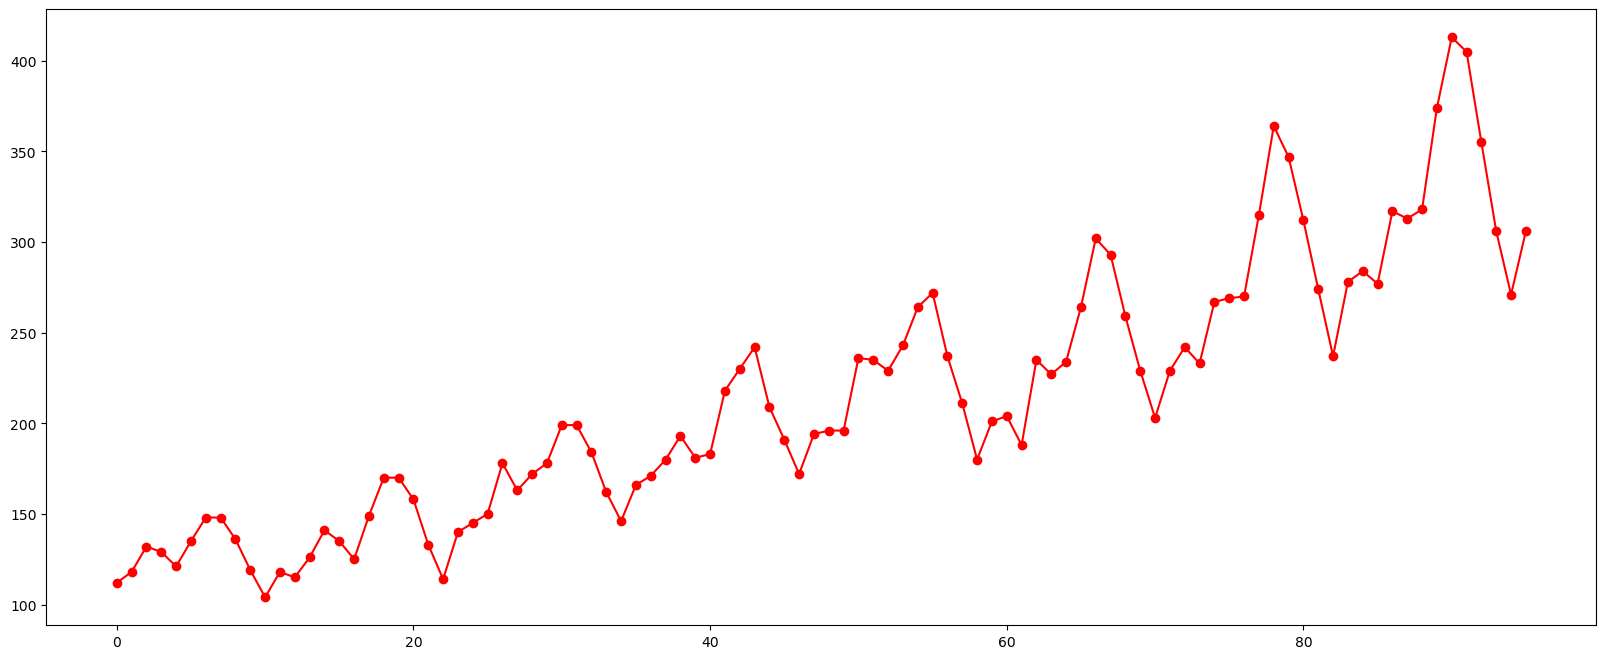

In [15]:
df['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

### Observation:
+ We can see that there is an increasing Trend. So, Trend is not constant.
+ Variance is also not constant.
+ Hence the time serise is not stationary.

### Yearly Passenger Analysis

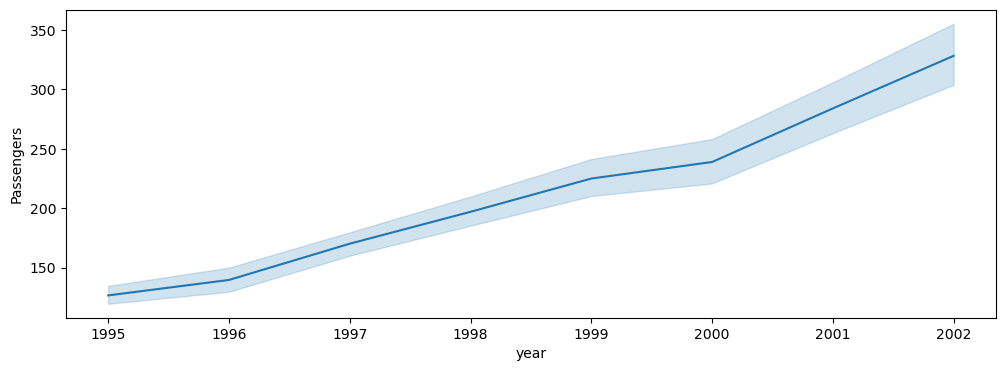

In [16]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Passengers",data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

### Box Plot of Each Year by Monthly Intervals

<Axes: xlabel='year', ylabel='Passengers'>

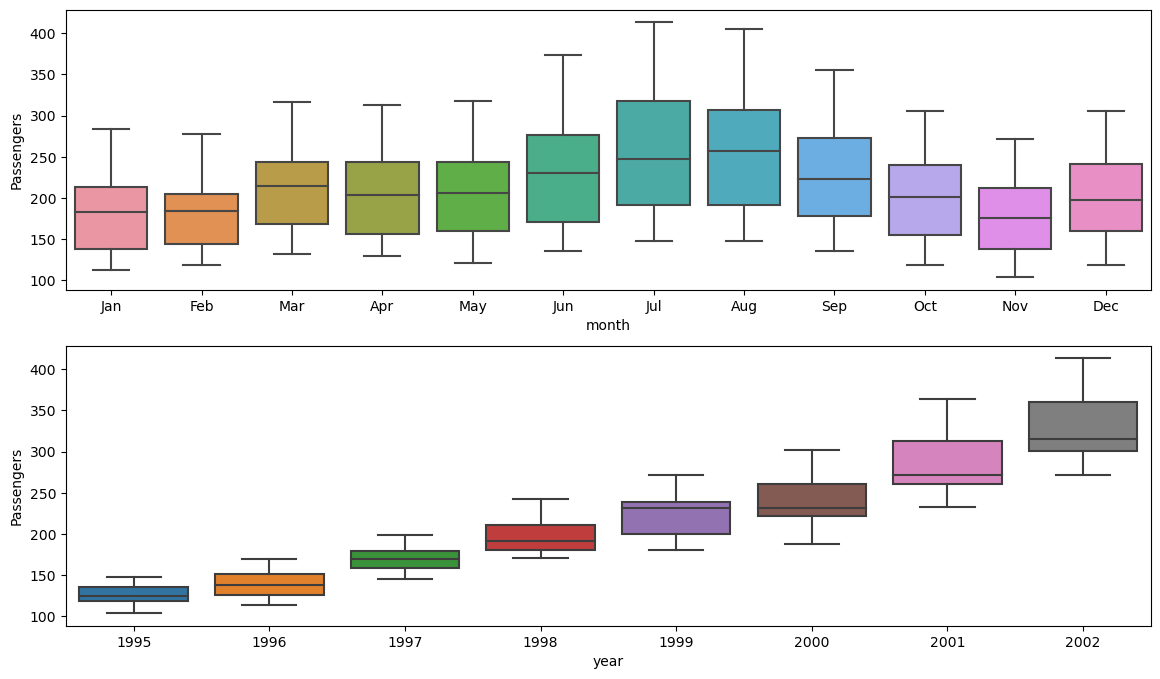

In [17]:
# Boxplot for ever
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

### Histogram

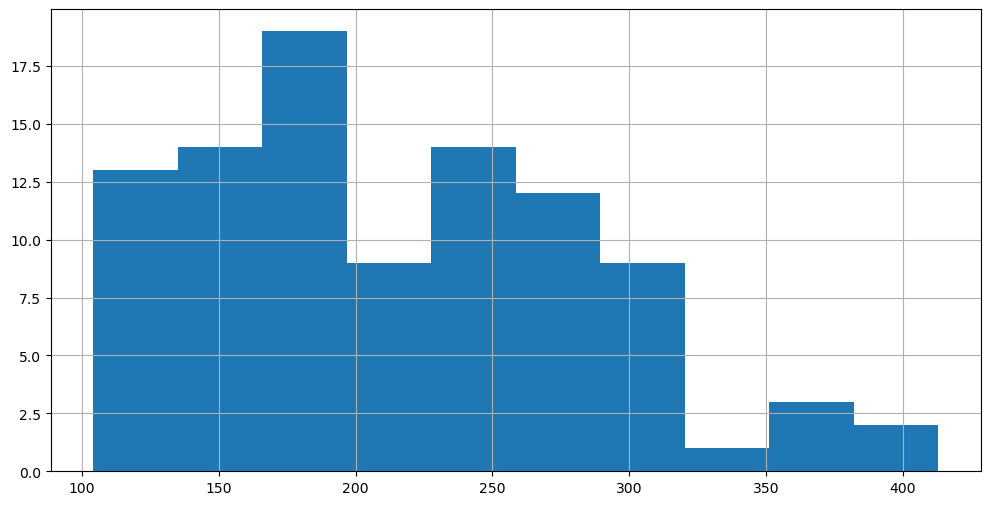

In [18]:
df.Passengers.hist(figsize=(12,6))
plt.show()

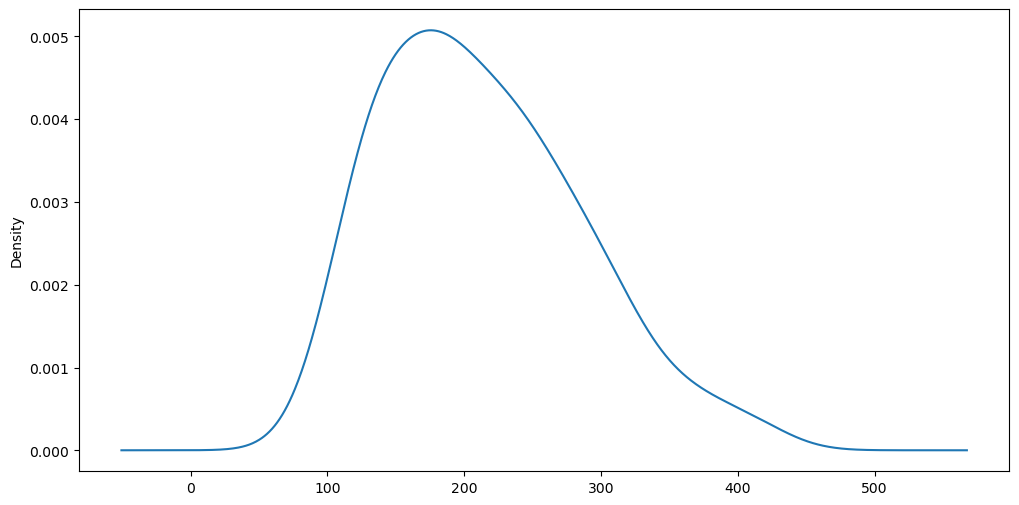

In [19]:
# create a density plot
df.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

In [20]:
df.drop(columns=['Month'],inplace=True)

df.sample(5)

,Passengers,Date,month,year
15,135,1996-04-01,Apr,1996
79,347,2001-08-01,Aug,2001
80,312,2001-09-01,Sep,2001
13,126,1996-02-01,Feb,1996
6,148,1995-07-01,Jul,1995


In [21]:
df.shape

(96, 4)

In [22]:
month_dummies= pd.DataFrame(pd.get_dummies(df['month']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
df = pd.concat([df,month_dummies], axis = 1)
df.head()

,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
df['t'] = np.arange(96)
df['t_squared']= df['t']*df['t']

In [25]:
df.head()

,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,2,4
3,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,3,9
4,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,4,16


In [26]:
log_passengers=np.log(df['Passengers'])
df['log_passengers']=log_passengers

<Axes: >

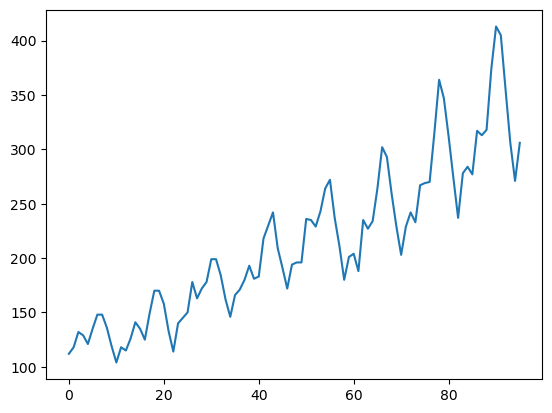

In [27]:
df['Passengers'].plot()

In [28]:
Train = df.head(76)
Test = df.tail(20)

In [29]:
import statsmodels.formula.api as smf

linear= smf.ols('Passengers~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmselin=np.sqrt((np.mean(np.array(Test['Passengers'])-np.array(predlin))**2))
rmselin

36.016377306903664

In [30]:
quad=smf.ols('Passengers~t+t_squared',data=Train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(Test[['t','t_squared']])))
rmsequad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predquad))**2))
rmsequad

58.49427463947668

In [31]:
expo=smf.ols('log_passengers~t',data=Train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(Test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

46.62154394719392

In [32]:
additive= smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep ',data=Train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmseadd=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predadd))**2))
rmseadd

132.25413439949475

In [33]:
addlinear= smf.ols('Passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(Test[['t','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmseaddlinear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

40.3028748829775

In [34]:
addquad=smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(Test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmseaddquad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

39.75976633807851

In [35]:
mulsea=smf.ols('log_passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmsemul= np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

137.61090856256442

In [36]:
mullin= smf.ols('log_passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(Test[['t','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])))
rmsemulin=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

11.784250179024797

In [37]:
mul_quad= smf.ols('log_passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(Test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

35.61106241558991

In [54]:
Table={'Model':pd.Series(['rmselin','rmsequad','rmseexpo','rmseadd','rmseaddlinear','rmseaddquad','rmsemul','rmsemulin','rmse_mul_quad']),'Values':pd.Series([rmselin,rmsequad,rmseexpo,rmseadd,rmseaddlinear,rmseaddquad,rmsemul,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table

,Model,Values
0,rmselin,36.016377
1,rmsequad,58.494275
2,rmseexpo,46.621544
3,rmseadd,132.254134
4,rmseaddlinear,40.302875
5,rmseaddquad,39.759766
6,rmsemul,137.610909
7,rmsemulin,11.784250
8,rmse_mul_quad,35.611062


In [39]:
df.to_excel('PREDICT_CC_DATA.xlsx')

In [40]:
pred=pd.read_excel('PREDICT_CC_DATA.xlsx')

In [41]:
final_pred= smf.ols('log_passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=df).fit()

In [42]:
pred_new = pd.Series(mullin.predict(pred))
pred_new

0     4.697298
1     4.712892
2     4.857256
3     4.821524
4     4.813365
        ...   
91    5.963853
92    5.856549
93    5.729468
94    5.599957
95    5.735181
Length: 96, dtype: float64

In [43]:
pred["Forecasted_passengers"] = np.exp(pd.Series(pred_new))

In [44]:
pred

,Unnamed: 0,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,...,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers,Forecasted_passengers
0,0,112,1995-01-01,Jan,1995,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.718499,109.650533
1,1,118,1995-02-01,Feb,1995,0,0,0,1,0,...,0,0,0,0,0,0,1,1,4.770685,111.373746
2,2,132,1995-03-01,Mar,1995,0,0,0,0,0,...,0,1,0,0,0,0,2,4,4.882802,128.670593
3,3,129,1995-04-01,Apr,1995,1,0,0,0,0,...,0,0,0,0,0,0,3,9,4.859812,124.154175
4,4,121,1995-05-01,May,1995,0,0,0,0,0,...,0,0,1,0,0,0,4,16,4.795791,123.145318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,405,2002-08-01,Aug,2002,0,1,0,0,0,...,0,0,0,0,0,0,91,8281,6.003887,389.106288
92,92,355,2002-09-01,Sep,2002,0,0,0,0,0,...,0,0,0,0,0,1,92,8464,5.872118,349.515964
93,93,306,2002-10-01,Oct,2002,0,0,0,0,0,...,0,0,0,0,1,0,93,8649,5.723585,307.805566
94,94,271,2002-11-01,Nov,2002,0,0,0,0,0,...,0,0,0,1,0,0,94,8836,5.602119,270.414715


In [45]:
mullin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     163.8
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.10e-42
Time:                        18:30:02   Log-Likelihood:                 124.47
No. Observations:                  76   AIC:                            -222.9
Df Residuals:                      63   BIC:                            -192.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4129      0.011    405.813      0.000       4.391       4.435
t              0.0111      0.000     40.758      0.000       0.011       0.012
Apr            0.3755      0.019     19.952      0.000       0.338       0.413
Aug            0.5450      0.020     27.013      0.000       0.505       0.585
Dec            0.2721      0.020     13.444      0.000       0.232       0.313
Feb            0.2890      0.019     15.376      0.000       0.251       0.327
Jan            0.2844      0.019     15.141      0.000       0.247       0.322
Jul            0.5476      0.020     27.153      0.000       0.507       0.588
Jun            0.4576      0.020     22.695      0.000       0.417       0.498
Mar            0.4223      0.019     22.456      0.000       0.385       0.460
May            0.3563      0.020     17.669      0.000       0.316       0.397
Nov            0.1479      0.020      7.316      0.000       0.108       0.188
Oct            0.2885      0.020     14.282      0.000       0.248       0.329
Sep            0.4266      0.020     21.135      0.000       0.386       0.467
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.518
Skew:                          -0.185   Prob(JB):                        0.772
Kurtosis:                       3.163   Cond. No.                     3.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

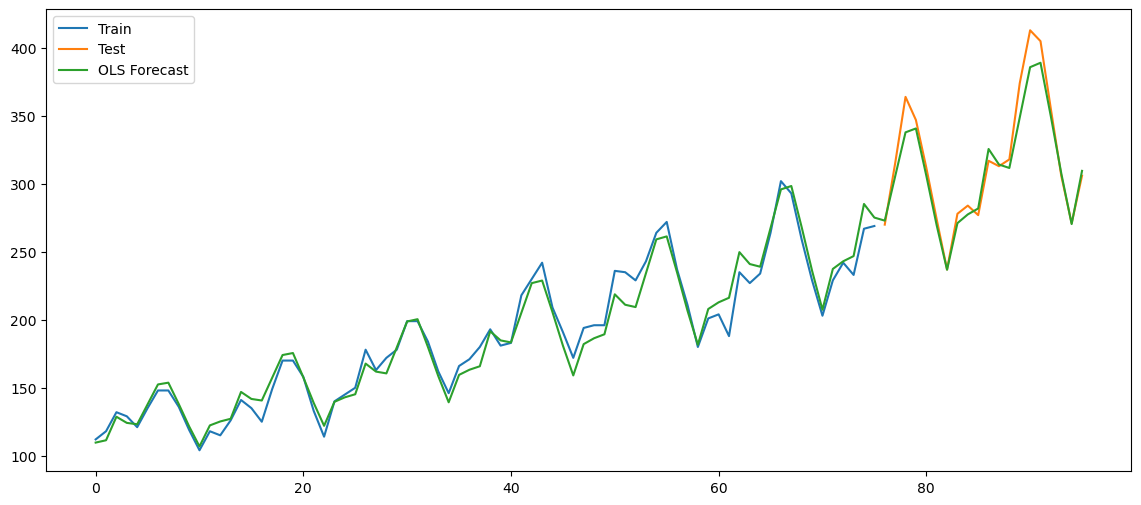

In [48]:
plt.figure(figsize=(14,6))
plt.plot(Train['Passengers'], label='Train')
plt.plot(Test['Passengers'], label='Test')
plt.plot(np.exp(pd.Series(pred_new)), label='OLS Forecast')
plt.legend(loc='best')
plt.show()

### We can see from the above graph that its has predicted most accurately the passenger number.

## The Airline is following Multiplicative Linear Seasonality.